In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# import italy-covid-daywise.csv which contains day-wise Covid-19 data for Italy 
df = pd.read_csv("italy-covid-daywise.csv")
df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [ ]:
# retrieve the number of rows and columns in the data frame
df.shape

(248, 4)

In [5]:
#view statistical information for numerical columns
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [ ]:
#view some basic information about the data frame like data types, 
# and number of non-nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [8]:
#create a list of columns within the data frame
df.columns.to_list()

['date', 'new_cases', 'new_deaths', 'new_tests']

In [9]:
#return only the days which had more than 1000 reported cases
df[df['new_cases']>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [10]:
#create positive_rate column that is equal to new_cases / new_tests
df['positive_rate'] = df['new_cases'] / df['new_tests']
df.head()

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN


In [11]:
#let's remove the positive_rate column
df.drop('positive_rate', axis=1, inplace=True)
df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [12]:
#sort to identify the days with the highest number of cases
df.sort_values('new_cases', ascending=False)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [19]:
#check the data type of date column, then convert it into a datetime
print("Before:",df['date'].dtype)
df['date'] = pd.to_datetime(df['date'])
print("After:",df['date'].dtype)

Before: object
After: datetime64[ns]


In [21]:
#extract different parts (day, month, weekday, and year) of 
#the date column into separate columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()
df['year'] = df['date'].dt.year
df.head()

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
0,2019-12-31,0.0,0.0,NaN,31,12,Tuesday,2019
1,2020-01-01,0.0,0.0,NaN,1,1,Wednesday,2020
2,2020-01-02,0.0,0.0,NaN,2,1,Thursday,2020
3,2020-01-03,0.0,0.0,NaN,3,1,Friday,2020
4,2020-01-04,0.0,0.0,NaN,4,1,Saturday,2020


In [24]:
#check the overall metrics for May (i.e, the total numbers of 'new_cases'
#, 'new_deaths', 'new_tests')
may = df[df['month'] == 5]
may_total_data = may[['new_cases', 'new_deaths', 'new_tests']].sum()
may_total_data

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [25]:
#which day seems like have more cases?
df[df['new_cases'] == df['new_cases'].max()]

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
82,2020-03-22,6557.0,795.0,NaN,22,3,Sunday,2020


In [28]:
#create a new dataframe with month-wise data
df_month = df.groupby(['month'])[['new_cases', 'new_deaths', 'new_tests']].sum()
df_month

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


C:\Users\alaa6\AppData\Local\Temp\ipykernel_16764\1135353152.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


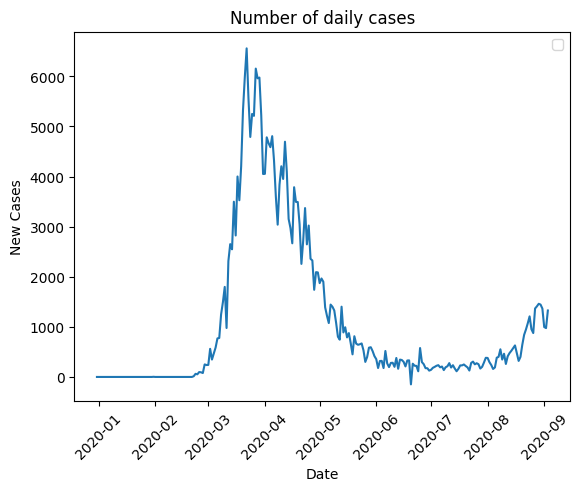

In [29]:
#plot a line graph showing how the number of daily cases varies over time.
plt.plot(df["date"], df["new_cases"])
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Number of daily cases")
plt.legend()
plt.xticks(rotation=45)
plt.show()